Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2020-10-xx, Lionel Perret

# Project work Module 2

This is my project work for Module 2. Plots, numbers and tables for the poster is produced with this Notebook.

**The datasets used are:**

1. Avalanche dataset - 13918 recorded avalanched from the Davos area

   In my module 1 project, I used this original dataset (https://www.envidat.ch/#/metadata/snow-avalanche-data-davos) and I   pre-process it, so that it can be used for this module 2 project.

   **The pre-processed avalanche data set used for this module 2-notebook can be found under:**
https://github.com/lionelperret76/ADS_Module2/upload/master/Processed_avalanche_data.csv
   


2. Meteo data from the Weissfluhjoch
   In my module 1 project, I used this original dataset (https://www.envidat.ch/#/metadata/10-16904-1) and I   pre-process it, so that it can be used for this module 2 project.
   
   **The pre-processed meteo data set used for this module 2-notebook can be found under:**
  https://github.com/lionelperret76/ADS_Module2/upload/master/Processed_meteo_data.csv 




**Outline of the data analysis**

1. Introduction (situation and goal)


2. Description of the data set
    1. Goal 1: Analysis of number of avalanches per day with regards to avalanche danger level
    2. Goal 2: Influence of new snow and other meteo parameters on number of avalanches per day



3. Conclusions


4. Outlook and open questions - Module 3

# 1. Introduction

In my freetime I am very often in the moutains, especially in winter where I enjoy doing ski tours outside of the regular ski slope. Avalanches and the corresponding risk is of interest to me.
**For the Module-2 project, my 2 objectives are**:

**- Objective 1: Analysis of number of avalanches per day with regards to avalanche danger level**

**- Objective 2: Influence of new snow and other meteo parameters on number of avalanches per day**


As mentionned in Conceptual Design Report, my final goal is to do a prediction of the avalanche danger level, with the available meteo parameter. At the end of this module-2 analysis, I provide some outlook how this could be done and also ask some open question that I have.

overall concept of data science project:




**Definition of significant**

I consider p-values below 0.001 as unlikely enough to reject the fluctuation hypothesis.

# 2. Description of the datasets

**Import modules we may need**

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import dataframe_image as dfi
import seaborn as sns
from scipy import stats

**Import the Davos avalanche datasets** 

In [2]:
# import avalanche data

#    DF_AVALANCHE          UNIT                    DESCRIPTION

#    Date                                          Date of release
#    Snow_type                                     Type of snow: "dry", "wet", "mixed", "unknown"
#    Trigger_type                                  Type of trigger: "HUMAN", "NATURAL", "EXPLOSIVE", "UNKNOWN"
#    Avalanche_size_m2     m2                      Avalanche area
#    Avalanche_risk_level                          Avalanche risk level on the day (1 to 5)
#    Num_natural
#    Num_tot                                       Number total of avalanche (with HUMAN, NATURAL, UNKNOW trigger type)

df_avalanche = pd.read_csv('../Processed_DataSets/Avalanches.csv', usecols=[0, 2, 3, 4, 5, 10, 11, 13],
                           dtype = {'Avalanche_danger_level': np.int64})
df_avalanche['Date'] = pd.to_datetime(df_avalanche['Date'])
df_avalanche.head(10)

,Date,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level,Num_Natural,Num_Human,Num_Unknown_t
0,1998-12-07,dry,NATURAL,"8,762.00",3,1,0,0
1,1998-12-07,dry,NATURAL,"30,522.00",3,1,0,0
2,1998-12-07,dry,HUMAN,"7,837.00",3,0,1,0
3,1998-12-07,dry,NATURAL,"1,522.00",3,1,0,0
4,1998-12-07,dry,NATURAL,"5,929.00",3,1,0,0
5,1998-12-07,dry,NATURAL,"4,611.00",3,1,0,0
6,1998-12-07,dry,NATURAL,"10,561.00",3,1,0,0
7,1998-12-08,unknown,HUMAN,639.00,3,0,1,0
8,1998-12-08,unknown,HUMAN,891.00,3,0,1,0
9,1998-12-08,dry,HUMAN,"24,276.00",3,0,1,0


## 2.A / Goal 1 - Number of "dry" avalanches per day with regards to danger level

In [3]:
# Group the dataframe avalanche in another df, in order to have all information available for the plot
df = df_avalanche.groupby(['Date','Avalanche_danger_level',
                                     'Snow_type', 'Trigger_type',]).agg({'Num_Natural': 'sum','Num_Human':'sum'})
df.head(10)

Num_Natural  \
Date       Avalanche_danger_level Snow_type Trigger_type                
1998-12-07 3                      dry       HUMAN                   0   
                                            NATURAL                 6   
1998-12-08 3                      dry       HUMAN                   0   
                                  unknown   HUMAN                   0   
1998-12-10 3                      dry       NATURAL                 1   
1998-12-11 3                      dry       NATURAL                 2   
1998-12-12 3                      dry       HUMAN                   0   
1998-12-13 3                      wet       NATURAL                 7   
1998-12-14 3                      dry       HUMAN                   0   
                                            NATURAL                 3   

                                                          Num_Human  
Date       Avalanche_danger_level Snow_type Trigger_type             
1998-12-07 3                      dry       HUMAN                 1  
                                            NATURAL               0  
1998-12-08 3                      dry       HUMAN                14  
                                  unknown   HUMAN                 2  
1998-12-10 3                      dry       NATURAL               0  
1998-12-11 3                      dry       NATURAL               0  
1998-12-12 3                      dry       HUMAN                 1  
1998-12-13 3                      wet       NATURAL               0  
1998-12-14 3                      dry       HUMAN                 4  
                                            NATURAL               0

**Get some statistic first with the number of days with recorded avalanche per danger level**

In [4]:
# Calculate and print the number of days per each risk level
NumDays5 = df.xs((5, 'dry'), level=('Avalanche_danger_level', 'Snow_type')).index.size
NumDays4 = df.xs((4, 'dry'), level=('Avalanche_danger_level', 'Snow_type')).index.size
NumDays3 = df.xs((3, 'dry'), level=('Avalanche_danger_level', 'Snow_type')).index.size
NumDays2 = df.xs((2, 'dry'), level=('Avalanche_danger_level', 'Snow_type')).index.size
NumDays1 = df.xs((1, 'dry'), level=('Avalanche_danger_level', 'Snow_type')).index.size
NumDaysTotal = NumDays1 + NumDays2 + NumDays3 + NumDays4 + NumDays5

print('Total number of days with "dry" avalanches recorded:        ' + str(NumDaysTotal))
print('Number of days with risk "1" :                              ' + str(NumDays1))
print('Number of days with risk "2" :                              ' + str(NumDays2))
print('Number of days with risk "3" :                              ' + str(NumDays3))
print('Number of days with risk "4" :                              ' + str(NumDays4))
print('Number of days with risk "5" :                              ' + str(NumDays5))

Total number of days with "dry" avalanches recorded:        1457
Number of days with risk "1" :                              14
Number of days with risk "2" :                              334
Number of days with risk "3" :                              941
Number of days with risk "4" :                              157
Number of days with risk "5" :                              11


- There is only 14 days with risk level “1", where “dry” avalanches have been recorded
- There is only 11 days with risk level “5”, where “dry” avalanches have been recorded

**==>For this analysis, the risk levels “1” and “5” are not considered and are filtered out**


In [5]:
# As explained in introduction, focus will be "dry" avalanches
# Calculate the different values for "dry avalanche" for the plot

#N1D = df.xs((1, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.mean()
N2D = df.xs((2, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.mean()
N3D = df.xs((3, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.mean()
N4D = df.xs((4, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.mean()
#N5D = df.xs((5, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.mean()
ValuesD = [N2D, N3D, N4D]

#y1D = df.xs((1, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.std()
y2D = df.xs((2, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.std()
y3D = df.xs((3, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.std()
y4D = df.xs((4, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.std()
#y5D = df.xs((5, 'dry', 'NATURAL'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Natural.std()         
Y_errD = [[0,0,0], [y2D, y3D, y4D]]

In [6]:
# Calculate the different values for "dry avalanche" for the plot
#N1DH = df.xs((1, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.mean()
N2DH = df.xs((2, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.mean()
N3DH = df.xs((3, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.mean()
N4DH = df.xs((4, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.mean()
#N5DH = df.xs((5, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.mean()
ValuesDH = [N2DH, N3DH, N4DH]

#y1DH = df.xs((1, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.std()
y2DH = df.xs((2, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.std()
y3DH = df.xs((3, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.std()
y4DH = df.xs((4, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.std()
#5DH = df.xs((5, 'dry', 'HUMAN'), level=['Avalanche_danger_level', 'Snow_type', 'Trigger_type']).Num_Human.std()         
Y_errDH = [[0,0,0], [y2DH, y3DH, y4DH]]

create the plot

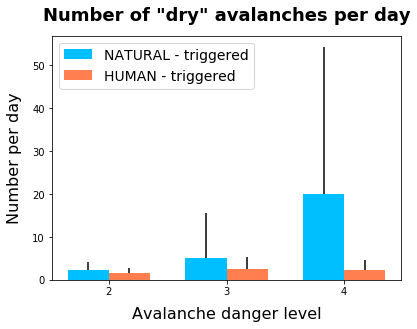

In [7]:
# General settings plotting
Title_size = {'fontsize': 18, 'fontweight': 'demibold' }
Legend_size = {'fontsize': 16}
OffsetAxes = 10
OffsetTitle = 15
FigWidth = 6
FigHeigth = 5
# Define the label and the x an y value
labels = ['2', '3', '4']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x- width/2, ValuesD, width, yerr = Y_errD, color = 'deepskyblue', label = 'NATURAL - triggered')
rects2 = ax.bar(x+ width/2, ValuesDH, width, yerr = Y_errDH, color = 'coral', label = 'HUMAN - triggered')

# Add some text
ax.set_xlabel('Avalanche danger level', fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_ylabel('Number per day',fontdict = Legend_size, labelpad = OffsetAxes)
ax.set_title('Number of "dry" avalanches per day',fontdict = Title_size, pad = OffsetTitle)
ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.tight_layout()
fig.set_figwidth(FigWidth)
fig.set_figheight(FigHeigth)
ax.legend(fontsize=14, loc = 'upper left')
plt.savefig('../Plots/Num_dry_avalanches_per_danger_level.png')
plt.show()

**The number of NATURAL triggered avalanches per day recorded in the davos area increases with the avalanche danger level. This is consistent with the definition of the european avalanche danger level, see picture below**

The number of HUMAN triggered avalanche per day is around 2 per day

**European Avalanche Danger Level:**

<img src="Lawinengefahr_Bandbreite_EN.png" alt="Drawing" style="width: 400px;"/>

**Check the distribution of the "Number of dry avalanches per day**

In [8]:
# create a separate df for "dry" avalanches and filter out the "EXPLOSIVE" triggered avalanche
# Explosive avalanches are caused on purpose to secure the ski slopes, so I have decided to filter it out
df_dry = df_avalanche.set_index('Date').copy()
df_dry = df_dry[df_dry['Snow_type'] == 'dry']
df_dry = df_dry[df_dry['Trigger_type'] != 'EXPLOSIVE']
df_dry

,Snow_type,Trigger_type,Avalanche_size_m2,Avalanche_danger_level,Num_Natural,Num_Human,Num_Unknown_t
Date,,,,,,,
1998-12-07,dry,NATURAL,"8,762.00",3,1,0,0
1998-12-07,dry,NATURAL,"30,522.00",3,1,0,0
1998-12-07,dry,HUMAN,"7,837.00",3,0,1,0
1998-12-07,dry,NATURAL,"1,522.00",3,1,0,0
1998-12-07,dry,NATURAL,"5,929.00",3,1,0,0
...,...,...,...,...,...,...,...
2019-04-15,dry,NATURAL,"4,564.00",3,1,0,0
2019-04-15,dry,HUMAN,"9,396.00",3,0,1,0
2019-04-15,dry,NATURAL,"2,519.00",3,1,0,0


In [9]:
# Resample the dataframe, to have one row per day and to count the total number of avalanche on that days
df_dry = df_dry.resample('D').agg({'Avalanche_danger_level': np.min, 'Num_Natural' : np.sum,
                                   'Num_Human' : np.sum, 'Num_Unknown_t' : np.sum})
# drop NaN values
df_dry = df_dry.dropna()
# Create a new column with total value for NATURAL-HUMAN-UNKNOWN triggered avalanches
df_dry['Num_Tot'] = df_dry['Num_Natural'] + df_dry['Num_Human'] + df_dry['Num_Unknown_t']
df_dry
# filter out avalanche risk level "1" and "5"
df_dry = df_dry[df_dry.Avalanche_danger_level != 5]
df_dry = df_dry[df_dry.Avalanche_danger_level != 1]
df_dry = df_dry.astype('int64') 
df_dry

,Avalanche_danger_level,Num_Natural,Num_Human,Num_Unknown_t,Num_Tot
Date,,,,,
1998-12-07,3,6,1,0,7
1998-12-08,3,0,14,0,14
1998-12-10,3,1,0,0,1
1998-12-11,3,2,0,0,2
1998-12-12,3,0,1,0,1
...,...,...,...,...,...
2019-03-24,2,1,0,0,1
2019-04-04,4,105,1,2,108
2019-04-05,3,21,1,2,24


**Describe the variable "Num_Tot" = Number of recorded avalanche per day for "dry" avalanches**

In [10]:
df_dry[['Num_Tot']].describe()

,Num_Tot
count,844.00
mean,6.87
std,16.07
min,1.00
25%,1.00
50%,2.00
75%,6.00
max,240.00


In [11]:
quantile = df_dry.Num_Tot.quantile([0.25, 0.50, 0.75, 0.9])
quantile

0.25    1.00
0.50    2.00
0.75    6.00
0.90   14.00
Name: Num_Tot, dtype: float64

**Plot the distribution and make a boxplot**

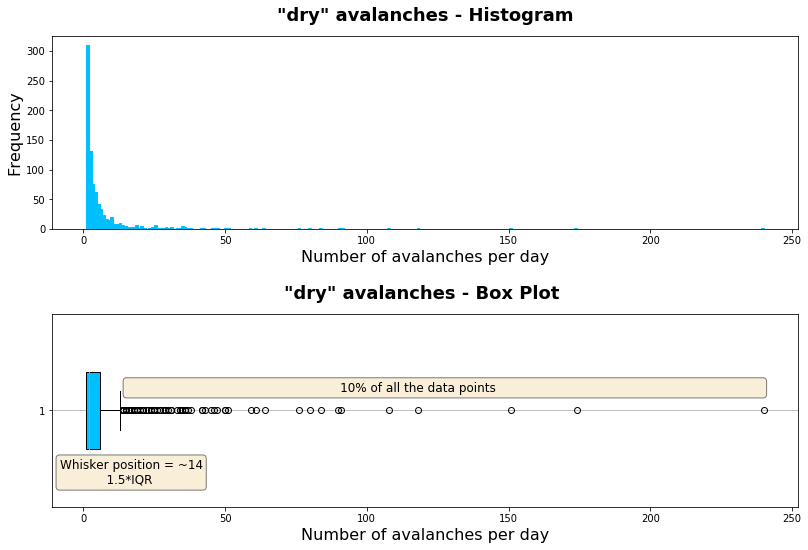

In [12]:
fig, [ax1, ax2] = plt.subplots(2, 1,figsize=(12,8))
# first plot of the figure
ax1.hist(df_dry.Num_Tot, bins=250, color = 'deepskyblue', fill=True, histtype='step',density = False)
ax1.set_title('"dry" avalanches - Histogram', fontdict=Title_size, pad = 15)
ax1.set_xlabel('Number of avalanches per day',fontdict=Legend_size)
ax1.set_ylabel('Frequency',fontdict=Legend_size)

# second plot of the figure
ax2= plt.subplot(2, 1, 2)
bplot1 = ax2.boxplot(df_dry.Num_Tot, showfliers=True, vert=False,patch_artist=True, labels=None, widths = 0.4)
ax2.set_title('"dry" avalanches - Box Plot ', fontdict=Title_size, pad = 15)
colors = ['deepskyblue']
for patch, color in zip(bplot1['boxes'],colors):# fill with colors
    patch.set_facecolor(color)
ax2.yaxis.grid(True)# adding horizontal grid lines
ax2.set_xlabel('Number of avalanches per day',fontdict=Legend_size)
textstr1 ='                                                       10% of all the data points                                                                     '
textstr2 = '''Whisker position = ~14
            1.5*IQR'''
# place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax2.text(0.10, 0.65, textstr1, transform=ax2.transAxes, fontsize=12,
         verticalalignment='top', bbox=props)
ax2.text(0.01, 0.25, textstr2, transform=ax2.transAxes, fontsize=12,
         verticalalignment='top', bbox=props)
fig.tight_layout(pad = 2)
plt.savefig('../Plots/dry_avalanches.png')
plt.show()

**Make another plot, with only the range going to the whisker**

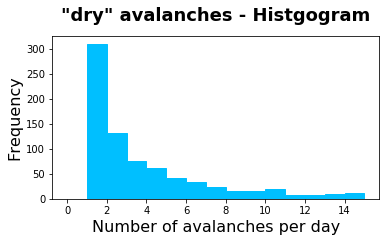

In [13]:
fig, ax = plt.subplots()
ax.hist(df_dry.Num_Tot, color = 'deepskyblue', bins = 15, range=(0,15), fill=True, histtype='step', label='"dry" avalanches')
ax.set_title('"dry" avalanches - Histgogram', fontdict=Title_size, pad = 15)
ax.set_xlabel('Number of avalanches per day',fontdict=Legend_size)
ax.set_ylabel('Frequency',fontdict=Legend_size)
fig.tight_layout(pad = 3)
plt.savefig('../Plots/dry_avalanches_scaled.png')
plt.show()

“Number of dry avalanche per day”:
Not a normal distribution, can look first like Poisson

**But "MEAN" != "VARIANCE"**

 
On the Box plot above:
The points outside of the whisker cannot be considered as “outlier”
**==>In some conditions, there are large number of avalanches per day**

## 2.B / Goal 2: Check the influence of New Snow and meteo parameter on avalanches number

The second focus of this study is to check the influence of the following meteo parameters
- new snow
- wind
- Temperature

on the number of avalanche per day

In [14]:
# import Weissfluhjoch meteo Data from Meteo_data.csv

#    COLUMNS                    UNIT          DESCRIPTION

#    Date                                      Date
#    Snow_fall                   cm            Snow fall sum of the day
#    Snow_fall_1                 cm            Snow fall sum of the last day
#    Snow10To25                  True/false    Snow_fall_3 between 10cm and 25cm
#    SnowAbove25                 True/false    Snow_fall_3 above 25cm
#    Temp_min_1                  degree C      Minimum of temperature of the last day
#    TempBelow7_5                True/false    Temp_min_1 below -7.5 degree
#    Wind_max_3                  km/h          Maximum of the mean wind of the last 3 days
#    WindAbove40                 True/false    Wind_max_3 above 40km/h
#    NewSnowProblem              1 or 0        New Snow Prolem condition = 1, other snow conditions = 0
#    Temp                        degree C      Air temperature (mean of the day)
#    Temp_mean_1                 degree C      Mean temperature of the last day
#    Temp_min                    degree C      Minimum of temperature of the day
#    Temp_min_3                  degree C      Minmean temperature of the last 3 days
#    Temp_max                    degree C      Maximum of temperature of the day
#    Wind                        km/h          Wind speed (mean of the day)
#    Wind_mean_1                 km/h          Mean wind of the last day
#    Wind_max                    km/h          Maximum wind of the day
#    Wind_max_1                  km/h          Maximum wind of the last day
#    Snow_height                 cm            Snow height measured at 08h00
#    RH                          [0-1}         relative humidity
#    ISWR                        W/m^2         incoming short wave radiation 
#    OSWR                        W/m^2         reflected short wave radiation
#    ILWR                        W/m^2         incoming long wave radiation
#    OLWR                        W/m^2         outgoing long wave radiation
#    TSS                         degree C      Snow surface temperature
df_meteo = pd.read_csv('../Processed_DataSets/Meteo.csv')
df_meteo['Date'] = pd.to_datetime(df_meteo['Date'])
df_meteo = df_meteo.set_index('Date')

In [15]:
# Print df_meteo between 2 dates, as example of the data
Print_df = df_meteo.reset_index()
start_date = "2017-01-31"
end_date = "2017-02-07"
after_start_date = Print_df['Date'] >= start_date
before_end_date = Print_df['Date'] <= end_date
between_two_dates = after_start_date & before_end_date
Print_df.loc[between_two_dates]

,Date,Snow_fall,Snow_fall_1,Snow10To25,SnowAbove25,Temp_min_1,TempBelow-7_5,Wind_max_3,WindAbove40,NewSnowProblem,...,Wind_mean_1,Wind_max,Wind_max_1,Snow_height,RH,ISWR,OSWR,ILWR,OLWR,TSS
6318,2017-01-31,49,8,False,True,-6.40,False,25.20,False,1,...,2.72,2.52,10.80,91.00,0.99,53.80,48.29,302.20,302.82,-3.13
6319,2017-02-01,0,49,False,True,-3.60,False,10.80,False,1,...,0.84,4.32,2.52,140.00,0.94,63.14,65.71,276.51,290.34,-6.09
6320,2017-02-02,0,0,False,False,-4.10,False,10.80,False,0,...,0.97,24.12,4.32,130.00,0.86,86.64,74.00,255.31,292.99,-5.60
6321,2017-02-03,0,0,False,False,-3.70,False,24.12,False,0,...,16.37,23.04,24.12,128.00,0.91,83.54,72.49,261.24,289.39,-6.33
6322,2017-02-04,0,0,False,False,-7.10,False,24.12,False,0,...,8.51,18.36,23.04,126.00,0.87,71.52,62.40,239.69,270.22,-10.89
6323,2017-02-05,12,0,True,False,-9.50,True,24.12,False,1,...,5.96,14.04,18.36,126.00,0.74,60.12,52.81,238.11,265.24,-12.20
6324,2017-02-06,0,12,True,False,-10.20,True,23.04,False,1,...,6.47,18.36,14.04,138.00,0.92,73.47,64.52,242.60,268.15,-11.24
6325,2017-02-07,0,0,False,False,-10.70,True,18.36,False,0,...,11.20,12.24,18.36,131.00,0.63,106.27,89.04,226.88,260.09,-13.45


In the processed meteo dataset, I have added the different columns to create a binary variable "New Snow Problem"

<img src="NewSnowProblem.jpg" alt="Drawing" style="width: 800px;"/>

**Create now 2 separate dataframe**
- "df_NSP_conditions" contains all the days when the "New Snow Problem" condition is true (=1)
- "df_other_conditions" contains all the other days, when the "New Snow Problem" is false (=0)

In [16]:
# Merge the df_dry dataframe with the meteo df
df_dry = pd.merge(df_meteo, df_dry, how='inner', left_index=True, right_index=True)
df_dry

,Snow_fall,Snow_fall_1,Snow10To25,SnowAbove25,Temp_min_1,TempBelow-7_5,Wind_max_3,WindAbove40,NewSnowProblem,Temp,...,ISWR,OSWR,ILWR,OLWR,TSS,Avalanche_danger_level,Num_Natural,Num_Human,Num_Unknown_t,Num_Tot
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-26,0,0,False,False,-12.00,True,28.48,False,0,-1.71,...,98.77,79.66,188.43,249.86,-18.09,2,0,1,0,1
1999-12-17,0,0,False,False,-16.70,True,32.18,False,0,-10.89,...,84.31,70.68,184.35,229.97,-22.60,3,1,0,0,1
1999-12-21,0,0,False,False,-18.00,True,30.46,False,0,-14.40,...,85.10,72.14,156.11,219.34,-24.55,2,1,0,0,1
1999-12-27,6,51,False,True,-8.40,True,29.23,False,1,-9.27,...,43.49,39.96,267.36,275.75,-9.25,4,3,3,0,6
1999-12-28,31,6,False,True,-11.70,True,29.23,False,1,-10.79,...,33.18,31.18,264.49,270.68,-10.44,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-20,0,0,False,False,-14.10,True,22.68,False,0,-12.39,...,327.85,269.33,174.41,245.60,-15.05,3,0,1,0,1
2017-04-21,0,0,False,False,-17.10,True,22.68,False,0,-6.27,...,340.04,276.34,184.16,260.38,-13.41,2,0,3,0,3
2017-04-22,0,0,False,False,-13.80,True,22.68,False,0,-1.77,...,321.14,253.47,225.61,291.29,-5.91,2,0,2,0,2


In [17]:
# creation of the df_NSP_conditions dataframe
df_NSP_conditions = df_dry[df_dry['NewSnowProblem']>0].copy()
# creation of the df_other_conditions dataframe
df_other_conditions = df_dry[df_dry['NewSnowProblem']<1].copy()

**Describe the two dataframe**

In [18]:
df_NSP_conditions[['Num_Tot']].describe()

,Num_Tot
count,133.00
mean,14.76
std,31.26
min,1.00
25%,2.00
50%,6.00
75%,12.00
max,240.00


In [19]:
df_other_conditions[['Num_Tot']].describe()

,Num_Tot
count,566.00
mean,4.98
std,8.76
min,1.00
25%,1.00
50%,2.00
75%,5.00
max,84.00


In [20]:
quantile = df_NSP_conditions.Num_Tot.quantile([0.25, 0.50, 0.75, 0.9])
quantile

0.25    2.00
0.50    6.00
0.75   12.00
0.90   30.80
Name: Num_Tot, dtype: float64

**Plot the histogram and the box plot of the variable "Num_Tot" = number of recorded dry avalanche per day for both data frame**

In [21]:
fontdict=Title_size
fontdict=Legend_size

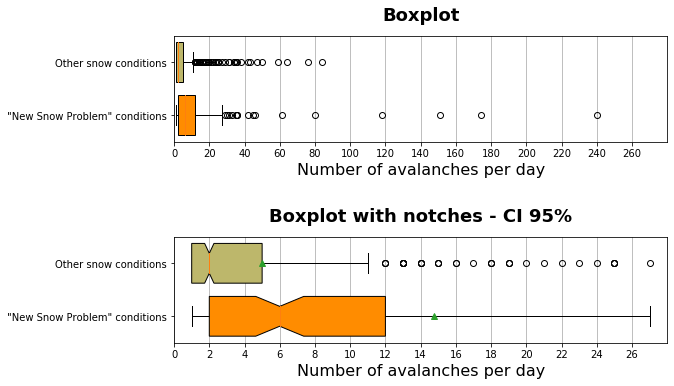

In [22]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 6))
labels = ['"New Snow Problem" conditions', 'Other snow conditions']

bplot1 = ax1.boxplot([df_NSP_conditions.Num_Tot, df_other_conditions.Num_Tot],# rectangular box plot
                     showfliers=True, vert=False, patch_artist=True, labels=labels, widths = 0.75)
ax1.set_title('Boxplot', fontdict=Title_size, pad = 15)
colors = ['darkorange', 'darkkhaki']
for patch, color in zip(bplot1['boxes'], colors):# fill with colors
    patch.set_facecolor(color)
ax1.xaxis.grid(True)# adding horizontal grid lines
ax1.set_xlabel('Number of avalanches per day',fontdict=Legend_size)
ax1.set_xticks(np.arange(0, 280, 20.0))
ax1.set_xlim(left = 0, right = 280)

bplot2 = ax2.boxplot([df_NSP_conditions.Num_Tot, df_other_conditions.Num_Tot], # rectangular box plot
                     notch = True, showmeans=True, showfliers=True, vert=False, patch_artist=True,
                     labels=labels, widths = 0.75)
ax2.set_title('Boxplot with notches - CI 95%',fontdict=Title_size, pad = 15)
ax2.set_xlim(left = 0, right = 28)
ax2.set_xlabel('Number of avalanches per day',fontdict=Legend_size)
for patch, color in zip(bplot2['boxes'], colors):# fill with colors
    patch.set_facecolor(color)
ax2.xaxis.grid(True)# adding horizontal grid lines
ax2.set_xlabel('Number of avalanches per day',fontdict=Legend_size)
ax2.set_xticks(np.arange(0, 28, 2.0))
fig.tight_layout(pad=3.0)
plt.savefig('../Plots/New_Snow_Problem_Boxplot.png')
plt.show()

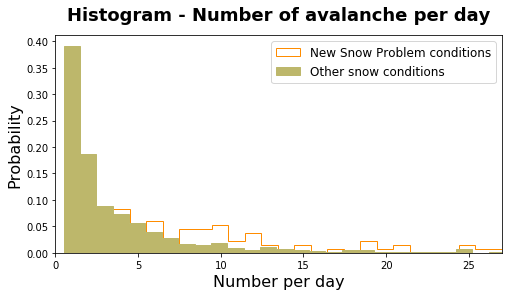

In [23]:
fig, ax3 = plt.subplots(figsize=(8, 4))
ax3.hist(df_NSP_conditions.Num_Tot, color = 'darkorange',
         fill=False, histtype='step', bins=240, label='New Snow Problem conditions', align = 'left', density = True)
ax3.hist(df_other_conditions.Num_Tot,  color = 'darkkhaki',
         fill=True, histtype='step',bins=84, label='Other snow conditions', align = 'left', density = True)
ax3.set_title('Histogram - Number of avalanche per day', fontdict=Title_size, pad = 15)
ax3.set_xlabel('Number per day',fontdict=Legend_size)
ax3.set_ylabel('Probability',fontdict=Legend_size)
ax3.set_xlim(left = 0, right = 27)
ax3.legend(fontsize = '12')
plt.savefig('../Plots/New_Snow_Problem_Histogram.png')
plt.show()

The median for "New Snow Problem" conditions is 3 and the median for the other snow conditions is 2

**==> On the boxplot at the bottom, as the notches do not overlapped, one can conclude that the 2 Medians are not the same (with 95% CI)**



**Mean for the "New Snow Problem" conditions: ~15 avalanches per day (green triangle)**

**Mean for the other snow conditions:          ~5 avalanches per day (green triangle)**

As those 2 distributions are not normally distributed, the Mann-Whitney test can be used to compare those distributions with regards to their means.

In [24]:
statistic, p_value_Mann = stats.mannwhitneyu(df_NSP_conditions.Num_Tot, df_other_conditions.Num_Tot)
print('p-value of Mann-Whitney test:        '+ p_value_Mann.round(11).astype(str))

p-value of Mann-Whitney test:        1e-10


**The result is that those 2 distributions do not have the same mean, as the p-value is << 0.05**

## 3.A / Outlook and open questions - module 3

In [25]:
df_dry.columns

Index(['Snow_fall', 'Snow_fall_1', 'Snow10To25', 'SnowAbove25', 'Temp_min_1',
       'TempBelow-7_5', 'Wind_max_3', 'WindAbove40', 'NewSnowProblem', 'Temp',
       'Temp_mean_1', 'Temp_min', 'Temp_min_3', 'Temp_max', 'Wind',
       'Wind_mean_1', 'Wind_max', 'Wind_max_1', 'Snow_height', 'RH', 'ISWR',
       'OSWR', 'ILWR', 'OLWR', 'TSS', 'Avalanche_danger_level', 'Num_Natural',
       'Num_Human', 'Num_Unknown_t', 'Num_Tot'],
      dtype='object')

In [26]:
df_dry = df_dry.reset_index().set_index('Avalanche_danger_level')

In [27]:
df_dry

,Date,Snow_fall,Snow_fall_1,Snow10To25,SnowAbove25,Temp_min_1,TempBelow-7_5,Wind_max_3,WindAbove40,NewSnowProblem,...,RH,ISWR,OSWR,ILWR,OLWR,TSS,Num_Natural,Num_Human,Num_Unknown_t,Num_Tot
Avalanche_danger_level,,,,,,,,,,,,,,,,,,,,,
2,1999-11-26,0,0,False,False,-12.00,True,28.48,False,0,...,0.21,98.77,79.66,188.43,249.86,-18.09,0,1,0,1
3,1999-12-17,0,0,False,False,-16.70,True,32.18,False,0,...,0.17,84.31,70.68,184.35,229.97,-22.60,1,0,0,1
2,1999-12-21,0,0,False,False,-18.00,True,30.46,False,0,...,0.37,85.10,72.14,156.11,219.34,-24.55,1,0,0,1
4,1999-12-27,6,51,False,True,-8.40,True,29.23,False,1,...,0.80,43.49,39.96,267.36,275.75,-9.25,3,3,0,6
3,1999-12-28,31,6,False,True,-11.70,True,29.23,False,1,...,0.86,33.18,31.18,264.49,270.68,-10.44,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2017-04-20,0,0,False,False,-14.10,True,22.68,False,0,...,0.97,327.85,269.33,174.41,245.60,-15.05,0,1,0,1
2,2017-04-21,0,0,False,False,-17.10,True,22.68,False,0,...,0.53,340.04,276.34,184.16,260.38,-13.41,0,3,0,3
2,2017-04-22,0,0,False,False,-13.80,True,22.68,False,0,...,0.74,321.14,253.47,225.61,291.29,-5.91,0,2,0,2


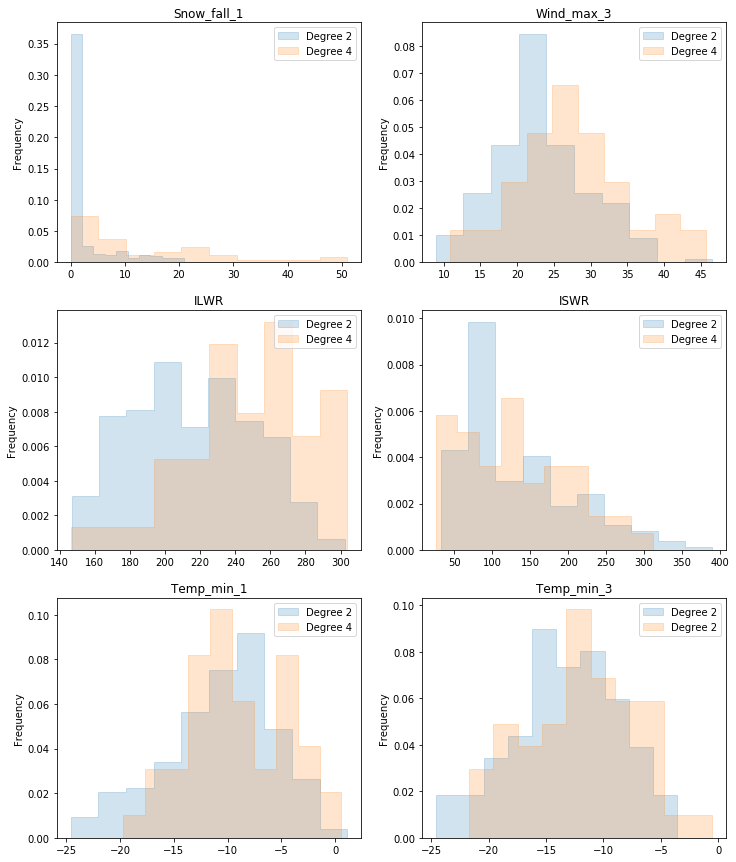

In [28]:
d2=2
Label2 = 'Danger Level 2'
d3=3
Label3 = 'Danger Level 3'
d4=4
Label4 = 'Danger Level 4'

Var1 = 'Snow_fall_1'
Var2 = 'Wind_max_3'
Var3 = 'ILWR'
Var4 = 'ISWR'
Var5 = 'Temp_min_1'
Var6 = 'Temp_min_3'

dataset_labels = ['Degree 2','Degree 4']

plt.figure(figsize=(12,15))

plt.subplot(3,2,1)
plt.title(Var1)
datasets1 = [df_dry.xs(d2)[Var1], df_dry.xs(d4)[Var1]]
i=0
for dataset in datasets1[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i], density = True)
    i+=1
plt.legend()

plt.subplot(3,2,2)
plt.title(Var2)
datasets2 = [df_dry.xs(d2)[Var2],df_dry.xs(d4)[Var2]]
i=0
for dataset in datasets2[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i], density = True)
    i+=1
plt.legend()


plt.subplot(3,2,3)
plt.title(Var3)
datasets3 = [df_dry.xs(d2)[Var3],df_dry.xs(d4)[Var3]]
i=0
for dataset in datasets3[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i], density = True)
    i+=1
plt.legend()

plt.subplot(3,2,4)
plt.title(Var4)
datasets4 = [df_dry.xs(d2)[Var4],df_dry.xs(d4)[Var4]]
i=0
for dataset in datasets4[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i], density = True)
    i+=1
plt.legend()

plt.subplot(3,2,5)
plt.title(Var5)
datasets5 = [df_dry.xs(d2)[Var5],df_dry.xs(d4)[Var5]]
i=0
for dataset in datasets5[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i], density = True)
    i+=1
plt.legend()

plt.subplot(3,2,6)
plt.title(Var6)
datasets6 = [df_dry.xs(d2)[Var6],df_dry.xs(d4)[Var6]]
i=0
for dataset in datasets6[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i], density = True)
plt.legend()

plt.show()

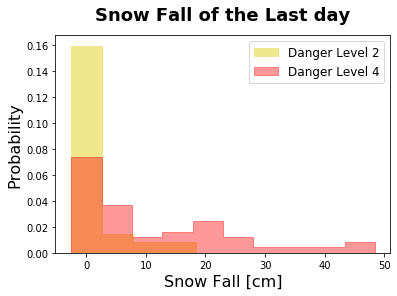

In [29]:
fig, ax3 = plt.subplots(figsize=(6, 4))
ax3.hist(df_dry.xs(d2)[Var1], color = 'khaki',
         fill=True, histtype='step', label=Label2, align = 'left', density = True, bins=4)
ax3.hist(df_dry.xs(d4)[Var1],  color = 'red',
         fill=True, histtype='step', label=Label4, align = 'left', density = True, bins=10, alpha=0.4)
ax3.set_title('Snow Fall of the Last day', fontdict=Title_size, pad = 15)
ax3.set_xlabel('Snow Fall [cm]',fontdict=Legend_size)
ax3.set_ylabel('Probability',fontdict=Legend_size)
#ax3.set_xlim(left = 0, right = 51)
ax3.legend(fontsize = '12')
plt.savefig('../Plots/Temp_Last_day-2and4.png')
plt.show()

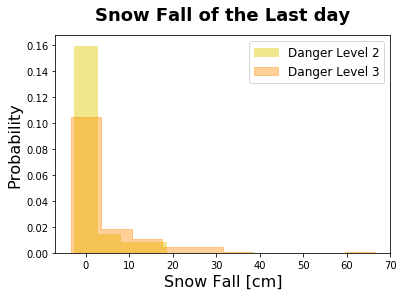

In [30]:
fig, ax3 = plt.subplots(figsize=(6, 4))
ax3.hist(df_dry.xs(d2)[Var1], color = 'khaki',
         fill=True, histtype='step', label=Label2, align = 'left', density = True, bins=4)
ax3.hist(df_dry.xs(d3)[Var1],  color = 'darkorange',
         fill=True, histtype='step', label=Label3, align = 'left', density = True, bins=10, alpha=0.4)
ax3.set_title('Snow Fall of the Last day', fontdict=Title_size, pad = 15)
ax3.set_xlabel('Snow Fall [cm]',fontdict=Legend_size)
ax3.set_ylabel('Probability',fontdict=Legend_size)
#ax3.set_xlim(left = 0, right = 51)
ax3.legend(fontsize = '12')
plt.savefig('../Plots/Temp_Last_day-2and3.png')
plt.show()

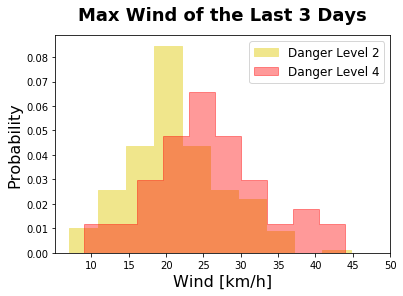

In [31]:
fig, ax3 = plt.subplots(figsize=(6, 4))
ax3.hist(df_dry.xs(d2)[Var2], color = 'khaki',
         fill=True, histtype='step', label=Label2, align = 'left', density = True)
ax3.hist(df_dry.xs(d4)[Var2],  color = 'red',
         fill=True, histtype='step', label=Label4, align = 'left', density = True,alpha=0.4)
ax3.set_title('Max Wind of the Last 3 Days', fontdict=Title_size, pad = 15)
ax3.set_xlabel('Wind [km/h]',fontdict=Legend_size)
ax3.set_ylabel('Probability',fontdict=Legend_size)
ax3.set_xlim(right = 50)
ax3.legend(fontsize = '12')
plt.savefig('../Plots/Wind_Last_3_days-2and4.png')
plt.show()

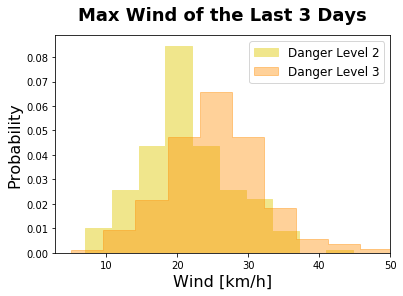

In [32]:
fig, ax3 = plt.subplots(figsize=(6, 4))
ax3.hist(df_dry.xs(d2)[Var2], color = 'khaki',
         fill=True, histtype='step', label=Label2, align = 'left', density = True)
ax3.hist(df_dry.xs(d3)[Var2],  color = 'darkorange',
         fill=True, histtype='step', label=Label3, align = 'left', density = True,alpha=0.4)
ax3.set_title('Max Wind of the Last 3 Days', fontdict=Title_size, pad = 15)
ax3.set_xlabel('Wind [km/h]',fontdict=Legend_size)
ax3.set_ylabel('Probability',fontdict=Legend_size)
ax3.set_xlim(right = 50)
ax3.legend(fontsize = '12')
plt.savefig('../Plots/Wind_Last_3_days-2and3.png')
plt.show()

[]

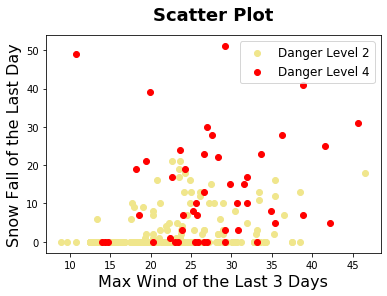

In [33]:
x = 'Wind_max_3'
y = 'Snow_fall_1'

fig, ax3 = plt.subplots(figsize=(6, 4))
ax3.scatter(df_dry.xs(2)[x], df_dry.xs(2)[y],
            c = 'khaki', label = Label2)
ax3.scatter(df_dry.xs(4)[x], df_dry.xs(4)[y],
            c = 'red', label = Label4)
ax3.set_title('Scatter Plot', fontdict=Title_size, pad = 15)
ax3.set_xlabel('Max Wind of the Last 3 Days',fontdict=Legend_size)
ax3.set_ylabel('Snow Fall of the Last Day',fontdict=Legend_size)
ax3.legend(fontsize = '12')
plt.savefig('../Plots/Scatter_plot_2and4.png')
plt.plot()

[]

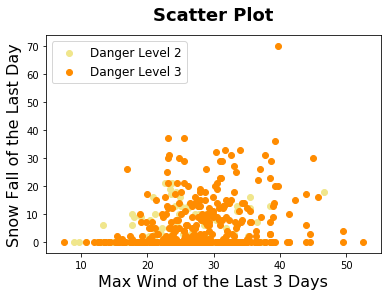

In [34]:
x = 'Wind_max_3'
y = 'Snow_fall_1'

fig, ax3 = plt.subplots(figsize=(6, 4))
ax3.scatter(df_dry.xs(2)[x], df_dry.xs(2)[y],
            c = 'khaki', label = Label2)
ax3.scatter(df_dry.xs(3)[x], df_dry.xs(3)[y],
            c = 'darkorange', label = Label3)
ax3.set_title('Scatter Plot', fontdict=Title_size, pad = 15)
ax3.set_xlabel('Max Wind of the Last 3 Days',fontdict=Legend_size)
ax3.set_ylabel('Snow Fall of the Last Day',fontdict=Legend_size)
ax3.legend(fontsize = '12')
plt.savefig('../Plots/Scatter_plot_2and3.png')
plt.plot()

[]

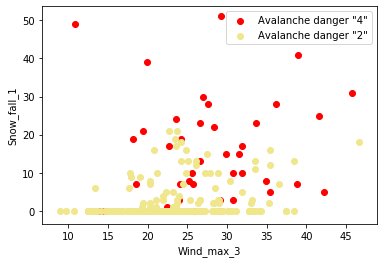

In [35]:
x = 'Wind_max_3'
y = 'Snow_fall_1' 

plt.figure(figsize=(6,4))
plt.scatter(df_dry.xs(4)[x], df_dry.xs(4)[y],
            c = 'red', label = 'Avalanche danger "4"')
plt.scatter(df_dry.xs(2)[x], df_dry.xs(2)[y],
            c = 'khaki', label = 'Avalanche danger "2"')

plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.plot()

In [36]:
df_dry

,Date,Snow_fall,Snow_fall_1,Snow10To25,SnowAbove25,Temp_min_1,TempBelow-7_5,Wind_max_3,WindAbove40,NewSnowProblem,...,RH,ISWR,OSWR,ILWR,OLWR,TSS,Num_Natural,Num_Human,Num_Unknown_t,Num_Tot
Avalanche_danger_level,,,,,,,,,,,,,,,,,,,,,
2,1999-11-26,0,0,False,False,-12.00,True,28.48,False,0,...,0.21,98.77,79.66,188.43,249.86,-18.09,0,1,0,1
3,1999-12-17,0,0,False,False,-16.70,True,32.18,False,0,...,0.17,84.31,70.68,184.35,229.97,-22.60,1,0,0,1
2,1999-12-21,0,0,False,False,-18.00,True,30.46,False,0,...,0.37,85.10,72.14,156.11,219.34,-24.55,1,0,0,1
4,1999-12-27,6,51,False,True,-8.40,True,29.23,False,1,...,0.80,43.49,39.96,267.36,275.75,-9.25,3,3,0,6
3,1999-12-28,31,6,False,True,-11.70,True,29.23,False,1,...,0.86,33.18,31.18,264.49,270.68,-10.44,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2017-04-20,0,0,False,False,-14.10,True,22.68,False,0,...,0.97,327.85,269.33,174.41,245.60,-15.05,0,1,0,1
2,2017-04-21,0,0,False,False,-17.10,True,22.68,False,0,...,0.53,340.04,276.34,184.16,260.38,-13.41,0,3,0,3
2,2017-04-22,0,0,False,False,-13.80,True,22.68,False,0,...,0.74,321.14,253.47,225.61,291.29,-5.91,0,2,0,2


In [37]:
df_dry.xs(2)[['Snow_fall_1','Wind_max_3', 'Temp','RH', 'ISWR', 'OSWR', 'ILWR', 'OLWR', 'TSS']]

,Snow_fall_1,Wind_max_3,Temp,RH,ISWR,OSWR,ILWR,OLWR,TSS
Avalanche_danger_level,,,,,,,,,
2,0,28.48,-1.71,0.21,98.77,79.66,188.43,249.86,-18.09
2,0,30.46,-14.40,0.37,85.10,72.14,156.11,219.34,-24.55
2,0,20.41,-1.42,0.15,85.68,72.02,183.49,249.73,-17.50
2,0,34.06,-8.31,0.66,116.56,100.13,227.81,268.65,-11.53
2,0,20.38,-7.15,0.86,94.30,84.47,268.48,282.88,-7.90
...,...,...,...,...,...,...,...,...,...
2,7,24.48,-1.60,0.82,151.61,125.01,258.33,296.40,-4.71
2,0,24.48,-6.08,0.62,183.92,153.41,200.83,253.51,-13.62
2,0,22.68,-6.27,0.53,340.04,276.34,184.16,260.38,-13.41


In [38]:
df_dry.xs(3)[['Snow_fall_1','Wind_max_3', 'Temp','RH', 'ISWR', 'OSWR', 'ILWR', 'OLWR', 'TSS']]

,Snow_fall_1,Wind_max_3,Temp,RH,ISWR,OSWR,ILWR,OLWR,TSS
Avalanche_danger_level,,,,,,,,,
3,0,32.18,-10.89,0.17,84.31,70.68,184.35,229.97,-22.60
3,6,29.23,-10.79,0.86,33.18,31.18,264.49,270.68,-10.44
3,31,32.58,-13.25,0.77,45.01,41.62,255.33,262.31,-12.48
3,0,32.58,-15.36,0.63,54.63,47.79,197.96,231.47,-19.58
3,0,32.58,-11.44,0.66,56.64,49.40,229.80,249.78,-15.14
...,...,...,...,...,...,...,...,...,...
3,0,26.28,-2.77,0.24,216.65,178.12,211.50,269.13,-11.02
3,0,26.28,-1.54,0.42,225.73,184.03,200.93,278.52,-8.72
3,0,26.28,-3.54,0.51,230.15,185.38,188.18,274.64,-9.59


In [39]:
df_dry.xs(4)[['Snow_fall_1','Wind_max_3', 'Temp','RH', 'ISWR', 'OSWR', 'ILWR', 'OLWR', 'TSS']].head()

,Snow_fall_1,Wind_max_3,Temp,RH,ISWR,OSWR,ILWR,OLWR,TSS
Avalanche_danger_level,,,,,,,,,
4,51,29.23,-9.27,0.80,43.49,39.96,267.36,275.75,-9.25
4,10,25.63,-1.62,0.69,129.74,110.47,212.85,285.13,-8.05
4,3,23.90,-2.77,0.90,207.48,184.62,295.99,309.26,-1.91
4,0,14.29,-1.07,0.79,153.45,127.90,266.61,304.36,-3.19
4,5,35.42,-13.37,0.60,123.22,111.56,205.98,247.93,-16.62


In [40]:
df_dry.xs(4).Snow_fall_1.size

48

## Conclusion

Our data analysis cannot confirm the claim of v4setosa. There is absolutely no evidence for the claim in our independent study. We advice the court to judge for not guilty. 

(And we sent a very large bill which the looser v4setosa had to pay. v4setosa went bankrott and we cannot sleep anymore...)

## Remarks regarding the poster session

I used four hours for this small analysis. To work it out, doing more tests, think through, study here and there, make nice tables and plots, create the poster, I would probably need another 10 hours. 

Considering that you may need longer due to less experience, this is what is expected from you for the poster session (about 30h work).